# Ajuste de curvas

## Motivação: evolução da população paraibana

Este exemplo lê um arquivo CSV, plota o gráfico de dispersão, compara modelos e formata os dados para visualização.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import PrintfTickFormatter, Range1d

from scipy import stats
from scipy import interpolate

# tabela de dados
df = pd.read_csv("file-pop-pb.csv")
x = df['ano']
y = df['pop. urbana']

# grafico de dispersao
f = figure(plot_width=400, plot_height=400)
f.scatter(x,y,fill_color="blue",radius=1,alpha=1)

# formatacao
f.background_fill_color = "blue"
f.background_fill_alpha = 0.02
f.x_range=Range1d(1960, 2020)
e = 5.e5
f.y_range=Range1d(y.min() - e,y.max() + e)
f.xaxis.axis_label = "Ano"
f.yaxis.axis_label = "Pop. urbana - PB"
f.yaxis[0].formatter = PrintfTickFormatter(format="%1.2e")

# interpolacao

f.line(x,y,color='green')

# estimando o valor da populacao em 1975 e 1982 por interpolacao
p = interpolate.interp1d(x, y)
xx = [1975,1982]
yy = p(xx)
print("População obtida por interpolação linear em: 1975 = {:d}; 1982 = {:d}; ".format(int(yy[0]),int(yy[1])))
f.square(xx,yy,color='black',line_width=4)

# ajuste por minimos quadrados

slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
px = intercept + slope*x
f.line(x,px,color='red')

output_notebook()
show(f)

População obtida por interpolação linear em: 1975 = 1225580; 1982 = 1552017; 


Loading BokehJS ...

In [3]:
df.set_index('ano')

,pop. urbana
ano,
1970,1002156
1980,1449004
1991,2015576
2000,2447212
2010,2902044


## Exemplo

Vamos resolver um problema de regressão linear por meio das equações normais passo a passo. Em primeiro lugar, importemos os módulos de computação numérica e de plotagem. 

In [4]:
# importação de módulos 
import numpy as np
import matplotlib.pyplot as plt

Consideremos a simples tabela abaixo de um experimento fictício que busca correlacionar densidade e diâmetro médio de grãos em alimentos.

densidade | diâmetro médio de grão
-|-
1.0|0.5
2.1|2.5
3.3|2.0
4.5|4.2


Vamos escrever os dados como _arrays_.

In [5]:
# tabela de dados
x = np.array([1,2,3,4]) # densidade
y = np.array([0.5,2.5,2.0,4.0]) # diâmetro

Agora, calculamos os coeficientes linear $\alpha_0$ e angular $\alpha_1$ pelas fórmulas das equações normais vistas em aula.

In [6]:
m = np.size(x)
alpha1 = (m*np.dot(x,y) - np.sum(x)*np.sum(y))/(m*np.dot(x,x)-np.sum(x)**2)
alpha0 = np.mean(y) - alpha1*np.mean(x)

Podemos agora escrever a equação da reta de regressão usando o _array_ `x` como abscissa. Este será o nosso _modelo de ajuste_.

In [7]:
y2 = alpha0 + alpha1*x

Enfim, plotamos o gráfico de dispersão dos valores _medidos_ juntamente com o _modelo de ajuste_ da seguinte forma:

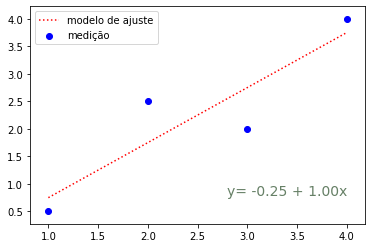

In [8]:
mod = plt.plot(x,y2,'r:'); # modelo
med = plt.scatter(x,y,c='b'); # medição
plt.legend({'modelo de ajuste':mod, 'medição':med}); # legenda

# esta linha adiciona a equação de ajuste ao gráfico na posição (x,y) = (2.8,0.8)
# com fonte tamanho 14 e cor RGB = [0.4,0.5,0.4].
plt.annotate('y= {0:.2f} + {1:.2f}x'.format(alpha0,alpha1),(2.8,0.8),fontsize=14,c=[0.4,0.5,0.4]);

Na prática, podemos calcular regressão linear usando o módulo `scipy.stats`. Vide _Code session 7_.